# Emotion and Emotion-Anticipation Violation within the Brain:
### Representational Similarity Analyses for the Amygdala and Anterior Cingulate Cortex


Sjoerd Evelo (10370862), Laura de Nooij (10341757), University of Amsterdam, Pattern Analysis 2018


## Abstract

Previous research shows that the amygdala plays a key role in emotion processing, and suggest a double role for the anterior cingulate cortex (ACC) with involvement in both emotion regulation and expectancy violation. However, expectancy violation has never been investigated in non-social emotional contexts. The current study investigates brain response patterns related to anticipated negative and neutral pictures in the amygdala, ACC and a control region (occipital pole). With Representational Similarity Analysis (RSA) we investigate whether these brain regions code for stimulus valence and/or anticipation violation (anticipated vs. unexpected stimulus valence). The results show low but significant correlations between the representational dissimilarity matrices of brain activity and stimulus aspects, for all three brain regions - including the control region. Due to lacking scientific evidence or theoretical background the occipital pole control region was assumed to have no relation to stimulus valence and anticipation violation, so the found correlation indicates a problem. Therefore, we conclude that the results cannot be reliably interpret. Alternative explanations include heavy noise (possibly correlated) or overlooked confound variables. 

## Introduction

Emotional processing in the brain has been often investigated. Many brain areas are involved in emotion, both cortical and subcortical structures (for review, see Dalgeish, 2004). When talking about the emotional brain, for many people the key role of the amygdala in emotion comes to mind first. Dalgeish (2004) states:

*"research established the amygdala as one of the most important brain regions for emotion, with a key role in processing social signals of emotion (particularly involving fear), in emotional conditioning and in the consolidation of emotional memories"*. 

Previous research also suggests that anterior cingulate cortex (ACC) has a regulatory role with regard to emotional responses (e.g., Etkin, Egner, & Kalisch, 2011). In addition, the ACC has been implicated in error detection (e.g., Oliveira, McDonald & Goodman, 2007). For this reason, Somerville, Heatherton and Kelley (2006) proposed that the ACC plays a role in expectancy violation in the emotional context of social rejection. They argued: 

 *“Several neuroimaging and computational modeling studies has revealed that the dACC serves as a conflict or discrepancy detector during information processing (e.g., Bush et al., 2000; Botvinick et al., 2001, 2004)”*
 
They indeed found that the ACC (both ventral and dorsal parts) was involved in violation of expectation. This suggested double role of the ACC is interesting in the context of emotion related anticipation and has never been studied in non-social emotional situations. 





### Current study

Therefore, the current study investigates brain response patterns related to anticipated negative and neutral pictures. Two aspects are of interest: 

-    1)	The valence of the stimuli (negative vs. neutral)       
-    2)	Whether the valence of the stimulus was anticipated or not (anticipated vs. unexpected)


Based on previous research (see introduction), the analysis will focus on two (bilateral) regions of interest (ROIs): the amygdala and anterior ACC. Thus, the research question of the current study is:
    
-    What types of stimulys information are coded within the amygdala and ACC: 
-      stimulus valence, correspondence of valence anticipation, or both?
   
In correspondence with the literature, we hypothesize that amygdala activity mainly represents information related to the valence of the stimulus, while ACC activity represents information related to both the valence of the stimulus and additionally whether it confirms or violates stimulus valence anticipation. 

In order to address this question we will apply a representational similarity analyses (RSA) for both ROI's and a control ROI (the bilateral occipital pole). Three conceptual representational dissimilarity matrices (RDM's) will be constructed: one RDM is based solely on the the stimulus valence, one RDM is solely based on whether the emotional value of the stimulus meets the subject’s expectation, and one RDM combines these to aspects. By correlating the brain RDMs with the conceptual RDMs, we will be able investigate what stimulus aspects are coded within the amygdala and ACC. A high significant correlation would mean that the aspect represented within the conceptual RDM "shapes" the brain response patterns for the regarded brain area. 

The expectation is that the brain activity RDM with amygdala as ROI correlates highest with the conceptual RDM that represents stimulus valence. However, the brain activity RDM with ACC as ROI is expected to correlate highest with the conceptual RDM that represents a combination of both aspects. The RDM based on the control ROI is expected to correlate low to all specified conceptual RDM's.




## Methods & Results

Within the current section, we will go through our analysis step by step. Comments within the code will give specific information on that part of the code, and running the code will often provide extra information or plots. The results of the analyses are presented directly. 

### Experimental stimuli and procedure

Within this study, we use the functional MRI data (3T MRI scanner) from the "emotion-anticipation task" of the *"Population Imaging of Psychology"* (PIOP) study of the University of Amsterdam. Within this task, subjects (n = 186) were presented with 30 passive trials. A trial consisted of short anticipation cue followed by an image that depicted a negative or neutral scene. The anticipation cue was a chart indicating high or low probability (80% vs. 20%) for the valence of the subsequent stimulus. This created a 2 (probability) x 2 (valence) within-subject design with four conditions: 

-   1) high probability for negative stimulus -> negative stimulus (anticipated, negative valence)    - 12 trials
-   2) high probability for neutral stimulus -> neutral stimulus (anticipated, neutral valence)       - 12 trials
-   3) high probability for negative stimulus -> neutral stimulus (unexptected, neutral valence)      - 3 trials
-   4) high probability for neutral stimulus -> negative stimulus (unexpected, negative valence)      - 3 trials

The pictures below depict the anticipation cues and examples of a neutral and negative scene. 

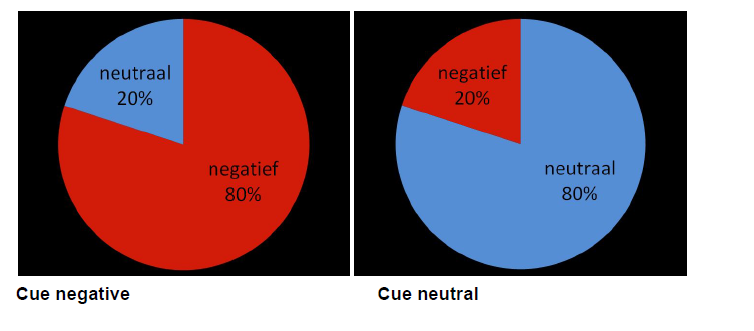



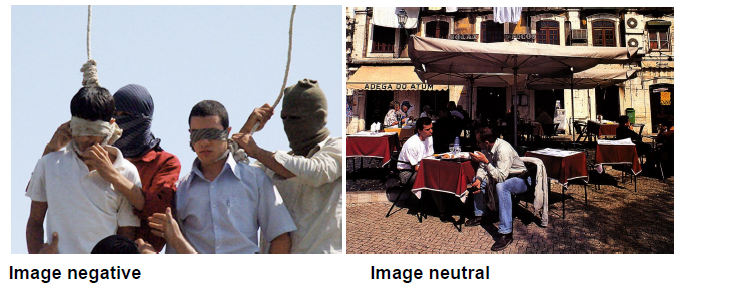

### Pattern estimation and data representation


In this first part of the code, we import some packages and functions and define a custom Mvp class. 

In [115]:
'''First, we need to import certain packages and functions'''

import nibabel as nib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import copy
import statistics
% matplotlib inline
from glob import glob
from neuroedu.utils import parse_conditions_from_design_file
from neuroedu.pattern_analysis.week_1.functions import sorted_fix
from neuroedu.utils import parse_conditions_from_design_file
from neuroedu.utils import get_ROI
from neuroedu.utils import print_ROIs
from sklearn.metrics.pairwise import pairwise_distances
from scipy import stats
from scipy.stats import spearmanr

In [5]:
class Mvp(object):
    """ This is a custom class that represents a Multivoxel pattern.
    
    Parameters
    ----------
    paths : list
        A list with all the to-be-loaded nifti-files
        
    Attributes
    ----------
    X : numpy-array
        Array of shape [n_samples, n_voxels]
   
    
    One must create an Mvp object for every mask applied
    """
    
    def __init__(self, paths):
        self.paths = paths 
        self.X = None  # will be filled in later during load()
    
    
    def load(self):
        """ This method loads the Mvp object into in array X with dimension [n_samples, n_voxels]. 
        
        Attributes
        ----------
        X : numpy-array
            Array of shape [n_samples, n_voxels] """
        

        for i, path in enumerate(self.paths):
            
            if i == 0:  # if first path, "peek" at voxel dims
                tmp = nib.load(path)
                K = np.prod(tmp.shape[:3])
                X = np.zeros((len(self.paths), K))
            
            X[i, :] = nib.load(path).get_data().flatten()
        
        # "Save" X by making it an attribute
        self.X = X
           
    
    def remove_zeros(self):
        """ Removes voxels which are all zero across samples
        (likely from outside brain). 
        
        
        Attributes
        ----------
        nonzero_voxels : list 
            list of column indices that represent nonzero voxels
        X_nz : numpy-array
             Array of shape [n_samples, n_voxels] without zero voxels (i.e. only non-zero voxels)
        
        """
        
        # Find voxels which are *not* zero across all samples
        nonzeros = np.sum(self.X, axis=0) != 0
        self.nonzero_voxels = nonzeros  # save attribute
        
        # Index X by nonzeros
        self.X_nz = self.X[:, nonzeros]

        
    def apply_mask(self, mask):
        """ Applies mask to data array. 

        Parameters
        ----------
        mask : boolean array
            Boolean array with dimensions of data (i.e. corresponding to voxels). Voxels are indexed by "True" elements. 
        
        Attributes
        ----------
        X_masked_nz : numpy-array
             Array of shape [n_samples, n_voxels] without zero voxels (i.e. only non-zero voxels) after application of mask
             
        """
        
        # flatten mask
        mask = mask.ravel()
        
        # Index X_nz by finding intersection
        mask_and_nz = mask[self.nonzero_voxels]
        self.X_masked_nz = self.X_nz[:, mask_and_nz]
        


#### voxel patterns and 

In order to be able to use our custom Mvp class, we need to extract all paths that lead to the data we want to use. We will use the **t-statistics** of univariate tests that tested brain activity during the period after **stimulus presentation** against baseline activity per condition (see: Experimental stimuli and procedure). Note that we will not consider the brain activity after the anticipation cue; this is irrelevant for our research question. We also extracted the condition labels from the design.con files. Importantly, the order of stimuli differed from subject to subject (i.e., the study used multiple designs). We therefore extracted the design per subject and stored it in a   

In [6]:
'''This piece of code loops over all subjects and adds all paths to the variable all_tstat_paths
which has shape [n_subjects,n_trials]. Not all participants have the necessary tstat files, so those 
who have not are ignored and their participant number is stored in the variable empty_pp (length = 53).
Furthermore, tstats and labels belonging to the anticipantion-cue trails were deleted.

The loop also stores the design (i.e. condition labels) in the variable all_designs (which also has
dimension [n_subject,n_trials] or [186,30]). Importantly, not all participants have the same design.
'''

n_subjects = 186
n_trials = 30
idx = 0
nchars_tstat = len('/home/Public/nipa_data/PIOP1/firstlevel/anticipation/WITHIN/sub-0010.feat/stats/tstat60.nii.gz')
nchars_design = len('antnegimgneg')
all_tstat_paths = np.chararray((n_subjects,n_trials),nchars_tstat,unicode=True)
all_designs = np.chararray((n_subjects,n_trials),nchars_design,unicode=True)
empty_pp = []

for i in range(10,249):
    paths = glob('/home/Public/nipa_data/PIOP1/firstlevel/anticipation/WITHIN/sub-' + str(i).zfill(4) + '.feat/stats/tstat*')
    if len(paths) == 0:
        empty_pp.append(i)
    else:
        all_paths = sorted_fix(paths)
        dfile = '/home/Public/nipa_data/PIOP1/firstlevel/anticipation/WITHIN/sub-' + str(i).zfill(4) + '.feat/design.con'
        design = parse_conditions_from_design_file(dfile)
        relevant_paths = []
        relevant_conditions = []
        for i in range(len(design)):  
            if 'img' in design[i]:
                relevant_paths.append(all_paths[i])
                relevant_conditions.append(design[i])
        all_designs[idx,:] = relevant_conditions
        all_tstat_paths[idx,:] = relevant_paths
        idx = idx + 1

#some tests
print("number of subjects that do not have necessary files: %i " % len(empty_pp))  
print('\n')
print("shape of the [n_subject,n_trials] matrix:")
print(all_tstat_paths.shape)
print('\n')
print("example of a participants' design:")
print(all_designs[150])
print('\n')
print("Are the designs the same for all participants?")
print((all_designs == all_designs[0]).all())
print("...No!") 



number of subjects that do not have necessary files: 53 


shape of the [n_subject,n_trials] matrix:
(186, 30)


example of a participants' design:
['antnegimgneg' 'antnegimgneg' 'antnegimgneg' 'antnegimgneg'
 'antnegimgneg' 'antnegimgneg' 'antnegimgneg' 'antnegimgneg'
 'antnegimgneg' 'antnegimgneg' 'antnegimgneg' 'antnegimgneg'
 'antneuimgneg' 'antneuimgneg' 'antneuimgneg' 'antneuimgneu'
 'antneuimgneu' 'antneuimgneu' 'antneuimgneu' 'antneuimgneu'
 'antneuimgneu' 'antneuimgneu' 'antneuimgneu' 'antneuimgneu'
 'antneuimgneu' 'antneuimgneu' 'antneuimgneu' 'antnegimgneu'
 'antnegimgneu' 'antnegimgneu']


Are the designs the same for all participants?
False
...No!


### Data preprocessing


We first extract the masks for our (bilateral) ROIs: the amygdala, the acc and (as control ROI) the (#########)

In [46]:
''' Here we already load the masks, we need these within the next cell'''
   
mask_amygdala_left = get_ROI('Left Amygdala')
mask_amygdala_right = get_ROI('Right Amygdala')
mask_amygdala = mask_amygdala_left+mask_amygdala_right

mask_acc_left = get_ROI('Left Cingulate Gyrus, anterior division')
mask_acc_right = get_ROI('Right Cingulate Gyrus, anterior division')
mask_acc = mask_acc_left+mask_acc_right

mask_occipital_left = get_ROI('Left Occipital Pole')
mask_occipital_right = get_ROI('Right Occipital Pole')
mask_occipital = mask_occipital_left+mask_occipital_right

We now extracted the masks, but before we apply them to all participant data we need to make sure the right areas are selected. 

Lets take a look in the brain.

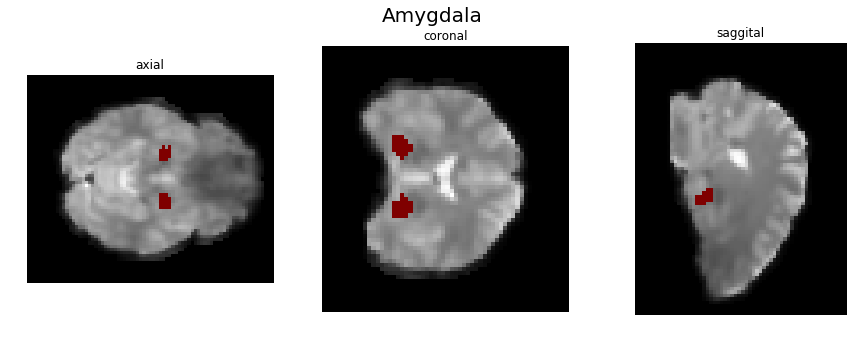

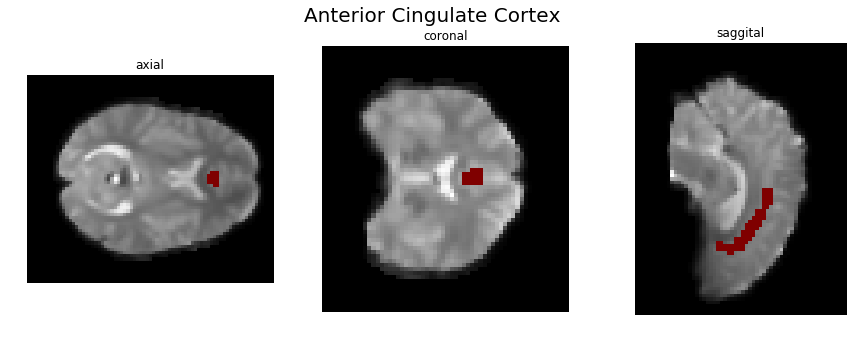

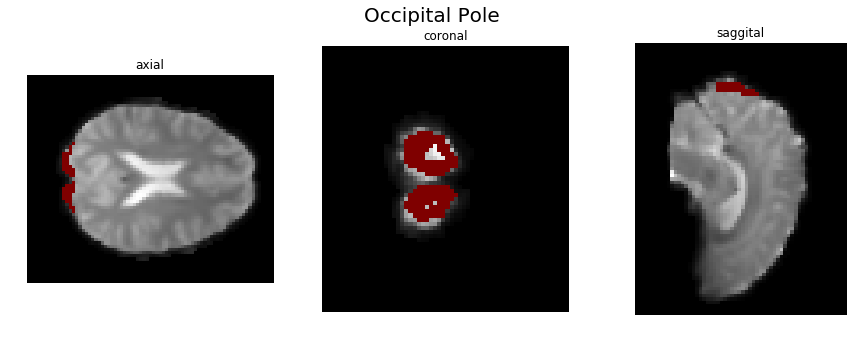

In [132]:
from copy import copy
from matplotlib import cm
path = '/home/Public/nipa_data/PIOP1/firstlevel/anticipation/WITHIN/sub-0010.feat/mean_func.nii.gz'
wholebrain = nib.load(path).get_data()

my_norm = matplotlib.colors.Normalize(vmin=0.0001, clip=False)
my_cmap = copy(cm.get_cmap('OrRd')) 
my_cmap.set_under('w', alpha= 0)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(wholebrain[:, : , 20], cmap = 'gray')
plt.imshow(mask_amygdala [:, : , 20], norm = my_norm, cmap=my_cmap)
plt.title('axial')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(wholebrain[:,43,:], cmap = 'gray')
plt.imshow(mask_amygdala [:,43,:],norm = my_norm, cmap=my_cmap)
plt.title('coronal')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(wholebrain[39,:,:], cmap = 'gray')
plt.imshow(mask_amygdala [39,:,:],norm = my_norm, cmap=my_cmap)
plt.title('saggital')
plt.axis('off')
plt.suptitle('Amygdala',fontsize = 20)
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(wholebrain[:, : , 26], cmap = 'gray')
plt.imshow(mask_acc [:, : , 26],norm = my_norm, cmap=my_cmap)
plt.axis('off')
plt.title('axial')
plt.subplot(1,3,2)
plt.imshow(wholebrain[:,43,:], cmap = 'gray')
plt.imshow(mask_acc [:,43,:],norm = my_norm, cmap=my_cmap)
plt.title('coronal')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(wholebrain[30,:,:], cmap = 'gray')
plt.imshow( mask_acc [30,:,:],norm = my_norm, cmap=my_cmap)
plt.axis('off')
plt.title('saggital')
plt.suptitle('Anterior Cingulate Cortex',fontsize=20)
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(wholebrain[:, : , 30], cmap = 'gray')
plt.imshow(mask_occipital [:, : , 30],norm = my_norm, cmap=my_cmap)
plt.axis('off')
plt.title('axial')
plt.subplot(1,3,2)
plt.imshow(wholebrain[:,12,:], cmap = 'gray')
plt.imshow(mask_occipital [:,12,:],norm = my_norm, cmap=my_cmap)
plt.title('coronal')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(wholebrain[30,:,:], cmap = 'gray')
plt.imshow( mask_occipital [30,:,:],norm = my_norm, cmap=my_cmap)
plt.axis('off')
plt.title('saggital')
plt.suptitle('Occipital Pole', fontsize=20)
plt.show()

Now it is time to load our data, preprocces it and apply the masks. Within our preprocessing pipeline, we remove the voxels that are zero across all samples, as these are assumed to be located outside the brain. We do *not* standardize our data, as this is not recommended for a Representational Similarity Analysis.

In [53]:
''' 
Within this part of the code, we first make a list of the subject names. These variable names represent the different 
subjects and will subsequently be used as keys in a dictionary. 

After that, we loop over the subject's tstat paths to create an mvp object per subject. Within this loop, we load the data,
remove zero voxels and apply a mask. The mvp object is stored in a list. We do this twice: once for the amygdala mask, 
and once for the acc mask. 

The list with subject names and two lists with mvp objects are used to create two dictionaries (one for the amygdala,
and one for the acc). The subject name is the key, and through this key we can access the mvp objects and their attributes. 
'''
# list with subject names
subject_names = []
for i in range(n_subjects):
    subject_names.append('sub'+ str(i+1))   
# making list and dictionary (amygdala)
print('Starting preprocessing of the amygdala mvp objects and storing them in a dictionairy...')
mvp_dict_amygdala = {}
for i in range(n_subjects):
    print('preprocessing %s' %subject_names[i])
    mvp = Mvp(all_tstat_paths[i])
    mvp.load()
    mvp.remove_zeros()
    mvp.apply_mask(mask_amygdala)
    mvp_dict_amygdala[subject_names[i]] = mvp
    
print('Done!')



Starting preprocessing of the amygdala mvp objects and storing them in a dictionairy...
preprocessing sub1
preprocessing sub2
preprocessing sub3
preprocessing sub4
preprocessing sub5
preprocessing sub6
preprocessing sub7
preprocessing sub8
preprocessing sub9
preprocessing sub10
preprocessing sub11
preprocessing sub12
preprocessing sub13
preprocessing sub14
preprocessing sub15
preprocessing sub16
preprocessing sub17
preprocessing sub18
preprocessing sub19
preprocessing sub20
preprocessing sub21
preprocessing sub22
preprocessing sub23
preprocessing sub24
preprocessing sub25
preprocessing sub26
preprocessing sub27
preprocessing sub28
preprocessing sub29
preprocessing sub30
preprocessing sub31
preprocessing sub32
preprocessing sub33
preprocessing sub34
preprocessing sub35
preprocessing sub36
preprocessing sub37
preprocessing sub38
preprocessing sub39
preprocessing sub40
preprocessing sub41
preprocessing sub42
preprocessing sub43
preprocessing sub44
preprocessing sub45
preprocessing sub46
p

In [58]:
# making a second list and dictionary (acc)    
mvp_dict_acc = {}
print('Starting preprocessing of the ACC mvp objects and storing them in a dictionairy...')
for i in range(n_subjects):
    print('preprocessing %s' %subject_names[i])
    mvp = Mvp(all_tstat_paths[i])
    mvp.load()
    mvp.remove_zeros()
    mvp.apply_mask(mask_acc)
    mvp_dict_acc[subject_names[i]] = mvp

print('Done!')
        

Starting preprocessing of the ACC mvp objects and storing them in a dictionairy...
preprocessing sub1
preprocessing sub2
preprocessing sub3
preprocessing sub4
preprocessing sub5
preprocessing sub6
preprocessing sub7
preprocessing sub8
preprocessing sub9
preprocessing sub10
preprocessing sub11
preprocessing sub12
preprocessing sub13
preprocessing sub14
preprocessing sub15
preprocessing sub16
preprocessing sub17
preprocessing sub18
preprocessing sub19
preprocessing sub20
preprocessing sub21
preprocessing sub22
preprocessing sub23
preprocessing sub24
preprocessing sub25
preprocessing sub26
preprocessing sub27
preprocessing sub28
preprocessing sub29
preprocessing sub30
preprocessing sub31
preprocessing sub32
preprocessing sub33
preprocessing sub34
preprocessing sub35
preprocessing sub36
preprocessing sub37
preprocessing sub38
preprocessing sub39
preprocessing sub40
preprocessing sub41
preprocessing sub42
preprocessing sub43
preprocessing sub44
preprocessing sub45
preprocessing sub46
prepro

In [59]:
# making the last list and dictionary (Occipital pole)    
mvp_dict_occipital = {}
print('Starting preprocessing of the Occipital pole mvp objects and storing them in a dictionairy...')
for i in range(n_subjects):
    print('preprocessing %s' %subject_names[i])
    mvp = Mvp(all_tstat_paths[i])
    mvp.load()
    mvp.remove_zeros()
    mvp.apply_mask(mask_occipital)
    mvp_dict_occipital[subject_names[i]] = mvp

print('Done!')
        

Starting preprocessing of the Occipital pole mvp objects and storing them in a dictionairy...
preprocessing sub1
preprocessing sub2
preprocessing sub3
preprocessing sub4
preprocessing sub5
preprocessing sub6
preprocessing sub7
preprocessing sub8
preprocessing sub9
preprocessing sub10
preprocessing sub11
preprocessing sub12
preprocessing sub13
preprocessing sub14
preprocessing sub15
preprocessing sub16
preprocessing sub17
preprocessing sub18
preprocessing sub19
preprocessing sub20
preprocessing sub21
preprocessing sub22
preprocessing sub23
preprocessing sub24
preprocessing sub25
preprocessing sub26
preprocessing sub27
preprocessing sub28
preprocessing sub29
preprocessing sub30
preprocessing sub31
preprocessing sub32
preprocessing sub33
preprocessing sub34
preprocessing sub35
preprocessing sub36
preprocessing sub37
preprocessing sub38
preprocessing sub39
preprocessing sub40
preprocessing sub41
preprocessing sub42
preprocessing sub43
preprocessing sub44
preprocessing sub45
preprocessing s

In [88]:
''' Through the dictionary keys we can access the mvp objects and their attributes, e.g. X_nz of 'sub1'; 
(the sample by voxel array with only non-zero voxels of the first stored subject) '''

print('The shape of the samples by voxels array of a subject, with ROI amygdala, is: %s'   % (mvp_dict_amygdala['sub1'].X_masked_nz.shape,))
print('The shape of the samples by voxels array of a subject, with ROI ACC, is: %s'   % (mvp_dict_acc['sub1'].X_masked_nz.shape,))
print('The shape of the samples by voxels array of a subject, with ROI Occipital pole, is: %s'   % (mvp_dict_occipital['sub1'].X_masked_nz.shape,))


The shape of the samples by voxels array of a subject, with ROI amygdala, is: (30, 135)
The shape of the samples by voxels array of a subject, with ROI ACC, is: (30, 404)
The shape of the samples by voxels array of a subject, with ROI Occipital pole, is: (30, 637)


### Stimulus-feature extraction (RSA)

#### Conceptual RDM's

To compare how the **amygdala**, **ACC** and **occipital pole** code for the described stimuli features **valence**, **anticipation** a **combination** or the **interaction** of both, we conduct an RSA analysis. To achieve this, we need to create different kinds of **Representational Dissimilarity Matrices (RDM's)**: 
- **Conceptual RDM's** that depict the dissimilarity between the stimuli in feature space and 
- **Brain RDM's** that depict the dissimilarity between the stimuli in brain space. 

Down below we create 4 conceptual RDM's: 

- One RDM for the valence of the features 
- One RDM for the anticipation violation of the features 
- One combination RDM.
- One interaction RDM

To construct these RDM's we need to give the labels a numeric value, so we can compare the distances between them. 

But before we get to that, we first define a function to create RDM's from the labels


In [71]:
def make_conceptual_rdm(labels):
    
    '''Function to create conceptual RDM's
    The function takes a vector with labels as input, and transforms it into an 1D array.
    the vector is duplicated, and for every index of the original vector the duplicated vector is subtracted to find the distance
    The absolute value is than stored in a matrix of the corresponding index [orginal vector index, duplicate vector index]
    The resulting matrix is returned'''
    
    labels = np.asarray(labels)
    labels_2 = labels
    N = len(labels)
    rdm = np.zeros((N,N))
    for i, label in enumerate(labels):
        for j, label_2 in enumerate(labels_2):
            #rdm[i,j] = abs(label - label_2)
            if label == label_2:
                rdm[i,j] = -1
            else:
                rdm[i,j] = 1
    return rdm

To make use of the function, we need to transform our labels that we selected from our design file and stored in `all_designs` to numeric values. We made two arrays with numeric values: one for the **valence** and one for the **anticipation violation**. Each row of the vector depects the numeric labels for a participant, the columns are the the different participants.

For the valence vector **neutral** images were assigned value **0** and **negative** images were assigned value **1**. 

The anticipation violation vector has value **0** for **expected** stimulus valence and a value of **1** for **violated** expectation.

In [72]:
'''Lets give our design files integer values 
First the stimulus valence value array'''

#create array for numeric vectors to be stored in
stimulus_valence_array = np.empty([n_subjects,n_trials])
#loop over all subjects
for i in range(n_subjects):
    #creat a temporary vector
    stimulus_valence_labels = []
    #inner loop over all string values in the design files
    #in the loop the strings are assigned values
    for design in all_designs[i]:
        if 'imgneu' in design:
            stimulus_valence_labels.append(0)
        else:
            stimulus_valence_labels.append(1)
    #the vector gets stored in the array
    stimulus_valence_array[i,:] = stimulus_valence_labels

'''Repeat for the anticipation array'''
stimulus_anticipation_array = np.empty([n_subjects,n_trials])
strings = ['neg', 'neu']
for i in range(n_subjects):
    stimulus_anticipation_labels = []
    for design in all_designs[i]:
        if all(x in design for x in strings):
            stimulus_anticipation_labels.append(1)
        else:
            stimulus_anticipation_labels.append(0)
        
    stimulus_anticipation_array[i,:] = stimulus_anticipation_labels

#Some examples what the vectors look like for our 1st subject
print('an example of our stimulus valence values. 0 = neutral stimulus and 1 = negative stimulus')
print(stimulus_valence_array[0])
print('\n')
print('an example of our anticipantion violation values. 0 = expected stimulus and 1 = violation')
print(stimulus_anticipation_array[0])

an example of our stimulus valence values. 0 = neutral stimulus and 1 = negative stimulus
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0.]


an example of our anticipantion violation values. 0 = expected stimulus and 1 = violation
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1.]


Now lets implement these arrays of numeric values by looping the function we created above over each subject, and actually create the RDM's for each subject.

**Note**: In the begining of our analysis we discovered that the design files differed between participants. As a result, we need subject-specific conceptual RDM's. Therefore all RDM's are stored into arrays.

In [73]:
'''Lets make arrays and store our RDM's in there. note: an RDM is already an array, so the resulting array is 3 dimensional! 
First off is the emotional valence RDM's '''

valence_rdm_array = np.empty([n_subjects,n_trials,n_trials])

for i in range(n_subjects):
    valence_rdm_array[i,:,:] = make_conceptual_rdm(stimulus_valence_array[i])
    
'''In the same manner we create the anticipation violation RDM's '''

anticipation_rdm_array = np.empty([n_subjects,n_trials,n_trials])

for i in range(n_subjects):
    anticipation_rdm_array[i,:,:] = make_conceptual_rdm(stimulus_anticipation_array[i])
    
'''To make a combination RDM of emotional valence and anticipation violation, we simply add the two RDM's together! '''

combination_rdm_array = valence_rdm_array+ anticipation_rdm_array

We have one last thing to do, to make an interaction RDM, we assign to each stimulus type a different value, and use the function to find the distances between those values. 

In [74]:
'''This cell will contain code for the interaction RDM '''

interaction_rdm_array = np.multiply(valence_rdm_array, anticipation_rdm_array)

interaction_array = np.empty([n_subjects,n_trials])

for i in range(all_designs.shape[0]):
    interaction_labels = []
    for design in all_designs[i]:
        if 'antnegimgneg' in design:
            interaction_labels.append(0)
        elif 'antneuimgneg' in design:
            interaction_labels.append(1)
        elif 'antnegimgneu'in design:
            interaction_labels.append(2)
        elif 'antneuimgneu' in design:
            interaction_labels.append(3)
        
    interaction_array[i,:] = interaction_labels
    

for i in range(n_subjects):
    interaction_rdm_array[i,:,:] = make_conceptual_rdm(interaction_array[i])

Down below an example of the different conceptual RDM´s we created is displayed for the first subject

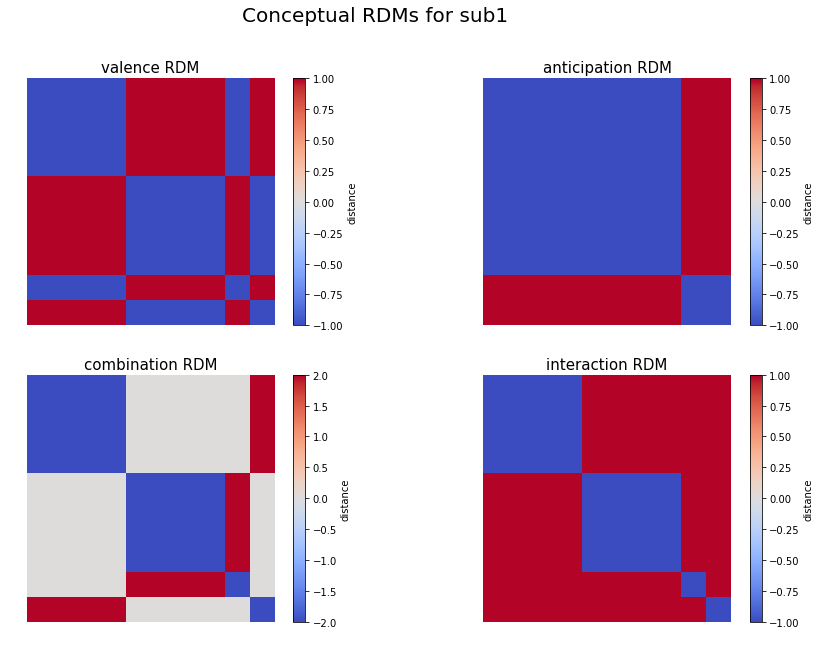

In [75]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)   
plt.title('valence RDM', fontsize = 15)
plt.imshow(valence_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='distance')

plt.subplot(2, 2, 2) 
plt.title('anticipation RDM', fontsize = 15)
plt.imshow(anticipation_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='distance')

plt.subplot(2, 2, 3)
plt.title('combination RDM', fontsize = 15)
plt.imshow(combination_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='distance')


plt.subplot(2, 2, 4)
plt.title('interaction RDM', fontsize = 15)
plt.imshow(interaction_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='distance')
plt.suptitle('Conceptual RDMs for sub1', fontsize = 20)
plt.show()

### Brain RDM creation

With the conceptual RDM's completed and stored in an array, we now need to create brain RDM's for each ROI to correlate with the conceptual RDM's. Again, the 2D RDM's will have the dimensions of the number of stimuli, [30,30]. We use the correlation measure as distance metric. 

First we define a function to easily create multiple brain RDM's, as we need one for each participant, for three ROI's.



In [62]:
def create_rdm_from_mvp(mvp_X):
    brain_rdm = pairwise_distances(mvp_X, metric = 'correlation')
    return brain_rdm 

Now we use this function to create two arrays of brain RDM's, one for the amygdala, and one for the ACC.

In [63]:
#First the amygdala RDM array
#Create an empty array for the RDM's to be stored in
amygdala_rdm_array = np.empty([n_subjects,n_trials,n_trials])

#We use a loop to apply the function to the masked array, and store the resulting RDM in the RDM array
for i in range(n_subjects):
    mvp_X = mvp_dict_amygdala['sub' + str(i+1)].X_masked_nz 
    amygdala_rdm_array[i,:,:] = create_rdm_from_mvp(mvp_X)
    
#We do the same to create the ACC RDM array

acc_rdm_array = np.empty([n_subjects,n_trials,n_trials])

for i in range(n_subjects):
    mvp_X = mvp_dict_acc['sub' + str(i+1)].X_masked_nz 
    acc_rdm_array[i,:,:] = create_rdm_from_mvp(mvp_X)

#And the Occipital pole RDM array  
occipital_rdm_array = np.empty([n_subjects,n_trials,n_trials])

for i in range(n_subjects):
    mvp_X = mvp_dict_occipital['sub' + str(i+1)].X_masked_nz 
    occipital_rdm_array[i,:,:] = create_rdm_from_mvp(mvp_X)

Down below we give an example of the brain RDM´s by displaying the three ROI RDM´s of the first participant

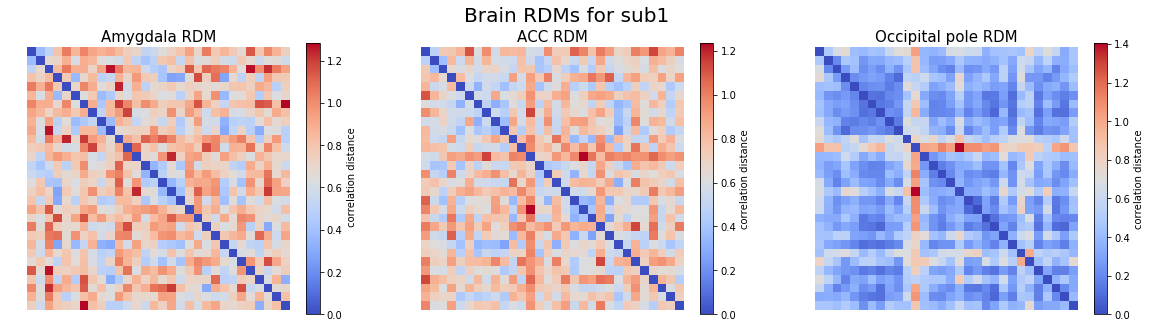

In [69]:
#printing the first subject RDM's for both ROI's

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)  
plt.title('Amygdala RDM', fontsize = 15)
plt.imshow(amygdala_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label=' correlation distance')
plt.subplot(1, 3, 2)  
plt.title('ACC RDM', fontsize = 15)
plt.imshow(acc_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='correlation distance')
plt.subplot(1, 3, 3)  
plt.title('Occipital pole RDM', fontsize = 15)
plt.imshow(occipital_rdm_array[0,:,:], cmap = 'coolwarm')
plt.axis('off')
plt.colorbar(label='correlation distance')
plt.suptitle('Brain RDMs for sub1', fontsize = 20)
plt.show()

### RDM Correlations

After the creation of all RDM's (7 x 186 = **1302** in total) it is time to correlate the conceptual RDM's with the brain RDM's.

However, before we can correlate them we need to extract only our true values: by creating an matrix with the dimensions of our amount of trails, we doubled our datapoints. Below we extract the upper triangle of our RDM, minus the diagonal, to find our true correlation.

In [77]:
#Use np.triu_indices to find the index of our upper triangle
indices = np.triu_indices(n_trials,k=1)

#create empty arrays with the dimensions that correspond to all our subjects and the length of our flattened upper traingle rdm
#conceptual RDM's
valence_rdm_triu = np.empty([n_subjects,len(indices[0])])
anticipation_rdm_triu = np.empty([n_subjects,len(indices[0])])
combination_rdm_triu = np.empty([n_subjects,len(indices[0])])
interaction_rdm_triu = np.empty([n_subjects,len(indices[0])])
#Brain RDM's
amygdala_rdm_triu = np.empty([n_subjects,len(indices[0])])
acc_rdm_triu = np.empty([n_subjects,len(indices[0])])
occipital_rdm_triu = np.empty([n_subjects,len(indices[0])])

#fill all the arrays for each subject per iteration of the loop
for i in range(n_subjects):
    #Conceptual RDM's
    valence_rdm_triu[i,:] = valence_rdm_array[i,indices[0],indices[1]]
    anticipation_rdm_triu[i,:] = anticipation_rdm_array[i,indices[0],indices[1]]
    combination_rdm_triu[i,:] = combination_rdm_array[i,indices[0],indices[1]]
    interaction_rdm_triu[i,:] = interaction_rdm_array[i,indices[0],indices[1]]
    #Brain RDM's
    amygdala_rdm_triu[i,:] = amygdala_rdm_array[i,indices[0],indices[1]]
    acc_rdm_triu[i,:] = acc_rdm_array[i,indices[0],indices[1]]
    occipital_rdm_triu[i,:] = occipital_rdm_array[i,indices[0],indices[1]]

Now we got rid of our inflated number of datapoints we can actually correlate the brain RDM's with the conceptual RDM's, and store the correlations of all participants for the 6 conceptual-brain RDM combinations in vectors.

We use **Spearman's rank correlation coefficient** as the correlation measure

In [78]:
#create empty vectors with of the length of the amount of subjects to store our correlations in

corr_amygdala_valence = np.zeros(n_subjects)
corr_amygdala_anticipation = np.zeros(n_subjects)
corr_amygdala_combination = np.zeros(n_subjects)
corr_amygdala_interaction = np.zeros(n_subjects)

corr_acc_valence = np.zeros(n_subjects)
corr_acc_anticipation = np.zeros(n_subjects)
corr_acc_combination = np.zeros(n_subjects)
corr_acc_interaction = np.zeros(n_subjects)

corr_occipital_valence = np.zeros(n_subjects)
corr_occipital_anticipation = np.zeros(n_subjects)
corr_occipital_combination = np.zeros(n_subjects)
corr_occipital_interaction = np.zeros(n_subjects)

#lets calculate all correlations for each subject in a loop, and store them in the vectors
for i in range(n_subjects):
    corr_amygdala_valence[i] = spearmanr(amygdala_rdm_triu[i,:], valence_rdm_triu[i,:])[0]
    corr_amygdala_anticipation[i] = spearmanr(amygdala_rdm_triu[i,:], anticipation_rdm_triu[i,:])[0]
    corr_amygdala_combination[i] = spearmanr(amygdala_rdm_triu[i,:], combination_rdm_triu[i,:])[0]
    corr_amygdala_interaction[i] = spearmanr(amygdala_rdm_triu[i,:], interaction_rdm_triu[i,:])[0]
    
    corr_acc_valence[i] = spearmanr(acc_rdm_triu[i,:], valence_rdm_triu[i,:])[0]
    corr_acc_anticipation[i] = spearmanr(acc_rdm_triu[i,:], anticipation_rdm_triu[i,:])[0]
    corr_acc_combination[i] = spearmanr(acc_rdm_triu[i,:], combination_rdm_triu[i,:])[0]
    corr_acc_interaction[i] = spearmanr(acc_rdm_triu[i,:], interaction_rdm_triu[i,:])[0]
    
    corr_occipital_valence[i] = spearmanr(occipital_rdm_triu[i,:], valence_rdm_triu[i,:])[0]
    corr_occipital_anticipation[i] = spearmanr(occipital_rdm_triu[i,:], anticipation_rdm_triu[i,:])[0]
    corr_occipital_combination[i] = spearmanr(occipital_rdm_triu[i,:], combination_rdm_triu[i,:])[0]
    corr_occipital_interaction[i] = spearmanr(occipital_rdm_triu[i,:], interaction_rdm_triu[i,:])[0]


Let's take a look at these correlations!

In [105]:
print( '\033[1m'+'Amygdala correlations'+  '\033[0m')
print('The mean correlation for the amygdala and stimuli valence is: %.10f.' %corr_amygdala_valence.mean() )
print('The mean correlation for the amygdala and anticipation violation is: %.10f.' %corr_amygdala_anticipation.mean())
print('The mean correlation for the amygdala and the combination RDM is: %.10f.' %corr_amygdala_combination.mean())
print('The mean correlation for the amygdala and the interaction RDM is: %.10f.' %corr_amygdala_interaction.mean())
print('\n')
print( '\033[1m'+'ACC correlations'+  '\033[0m')
print('The mean correlation for the ACC and stimuli valence is: %.10f.' %corr_acc_valence.mean())
print('The mean correlation for the ACC and anticipation violation is: %.10f.' %corr_acc_anticipation.mean())
print('The mean correlation for the ACC and the combination RDM is: %.10f.' %corr_acc_combination.mean())
print('The mean correlation for the ACC and the interaction RDM is: %.10f.' %corr_acc_interaction.mean())
print('\n')
print( '\033[1m'+'Occipital pole correlations'+  '\033[0m')
print('The mean correlation for the occipital pole and stimuli valence is: %.10f.' %corr_occipital_valence.mean())
print('The mean correlation for the occipital pole and anticipation violation is: %.10f.' %corr_occipital_anticipation.mean())
print('The mean correlation for the occipital pole and the combination RDM is: %.10f.' %corr_occipital_combination.mean())
print('The mean correlation for the occipital pole and the interaction RDM is: %.10f.' %corr_occipital_interaction.mean())

Amygdala correlations
The mean correlation for the amygdala and stimuli valence is: 0.0511616119.
The mean correlation for the amygdala and anticipation violation is: -0.0124763296.
The mean correlation for the amygdala and the combination RDM is: 0.0305537709.
The mean correlation for the amygdala and the interaction RDM is: 0.0365020811.


ACC correlations
The mean correlation for the ACC and stimuli valence is: 0.0556405919.
The mean correlation for the ACC and anticipation violation is: -0.0119628616.
The mean correlation for the ACC and the combination RDM is: 0.0339501862.
The mean correlation for the ACC and the interaction RDM is: 0.0377506662.


Occipital pole correlations
The mean correlation for the occipital pole and stimuli valence is: 0.0883787055.
The mean correlation for the occipital pole and anticipation violation is: -0.0501054766.
The mean correlation for the occipital pole and the combination RDM is: 0.0322475152.
The mean correlation for the occipital pole and the

### Noise ceiling

Those correlations look pretty small. However, fMRI data is notoriously noisy. Therefore we need to take the noise ceiling into account. The noice cieling is the maximum correlation possible given the noise in our signal.

In [106]:
#First we need an average upper-traingle RDM for both ROI's
average_RDM_amygdala = np.mean(amygdala_rdm_triu, axis = 0)
average_RDM_acc = np.mean(acc_rdm_triu, axis = 0)
average_RDM_occipital = np.mean(occipital_rdm_triu, axis = 0)
#Specify vectors to store our correlations in
nc_corr_amygdala = np.zeros(n_subjects)
nc_corr_acc = np.zeros(n_subjects)
nc_corr_occipital = np.zeros(n_subjects)

#Loop all subjects RDM's over the RDM to get the highest possible correlation given our signal
for i in range(n_subjects):
    nc_corr_amygdala[i] = spearmanr(amygdala_rdm_triu[i,:], average_RDM_amygdala)[0]
    nc_corr_acc[i] = spearmanr(acc_rdm_triu[i,:], average_RDM_acc)[0]
    nc_corr_occipital[i] = spearmanr(occipital_rdm_triu[i,:], average_RDM_occipital)[0]

#Average and print
nc_amygdala = np.mean(nc_corr_amygdala)
nc_acc = np.mean(nc_corr_acc)
nc_occipital = np.mean(nc_corr_occipital)
print('noise ceilings:')
print('Amygdala: %.10f' % nc_amygdala) 
print('ACC: %.10f' %nc_acc)
print('Occipital pole: %.10f' %nc_occipital)

noise ceilings:
Amygdala: 0.2749519200
ACC: 0.2725782123
Occipital pole: 0.3848769145


As it turns out, the noise cieling is pretty low. Our small correlation coefficients reach about 20% of the noise ceiling at maximum and might still have a chance to significantly differ from 0. 

### Parametric testing

#### Difference from zero

We use **one sample T-tests** per correlation array (twelve in total) to find out if the correlation coefficients are significant. 


In [93]:
ttest_amygdala_valence = stats.ttest_1samp(corr_amygdala_valence, 0)
ttest_amygdala_anticipation = stats.ttest_1samp(corr_amygdala_anticipation, 0)
ttest_amygdala_combination = stats.ttest_1samp(corr_amygdala_combination, 0)
ttest_amygdala_interaction = stats.ttest_1samp(corr_amygdala_interaction, 0)

ttest_acc_valence = stats.ttest_1samp(corr_acc_valence, 0)
ttest_acc_anticipation = stats.ttest_1samp(corr_acc_anticipation, 0)
ttest_acc_combination = stats.ttest_1samp(corr_acc_combination, 0)
ttest_acc_interaction = stats.ttest_1samp(corr_acc_interaction, 0)

ttest_occipital_valence = stats.ttest_1samp(corr_occipital_valence, 0)
ttest_occipital_anticipation = stats.ttest_1samp(corr_occipital_anticipation, 0)
ttest_occipital_combination = stats.ttest_1samp(corr_occipital_combination, 0)
ttest_occipital_interaction = stats.ttest_1samp(corr_occipital_interaction, 0)

print('T statistic for the amygdala-valence correlation was %.06f with a p-value of %.03e' %ttest_amygdala_valence)
print('T statistic for the amygdala-anticipation correlation was %.06f with a p-value of %.03f' %ttest_amygdala_anticipation)
print('T statistic for the amygdala-combination RDM correlation was %.06f with a p-value of %.03e' %ttest_amygdala_combination)
print('T statistic for the amygdala-interaction RDM correlation was %.06f with a p-value of %.03e' %ttest_amygdala_interaction)
print('\n')
print('T statistic for the ACC-valence correlation was %.06f with a p-value of %.03e' %ttest_acc_valence)
print('T statistic for the ACC-anticipation correlation was %.06f with a p-value of %.03f' %ttest_acc_anticipation)
print('T statistic for the ACC-combination RDM correlation was %.06f with a p-value of %.03e' %ttest_acc_combination)
print('T statistic for the ACC-interaction RDM correlation was %.06f with a p-value of %.03e' %ttest_acc_interaction)
print('\n')
print('T statistic for the occipital-valence correlation was %.06f with a p-value of %.03e' %ttest_occipital_valence)
print('T statistic for the occipital-anticipation correlation was %.06f with a p-value of %.03e' %ttest_occipital_anticipation)
print('T statistic for the occipital-combination RDM correlation was %.06f with a p-value of %.03e' %ttest_occipital_combination)
print('T statistic for the occipital-interaction RDM correlation was %.06f with a p-value of %.03e' %ttest_occipital_interaction)



T statistic for the amygdala-valence correlation was 11.448171 with a p-value of 2.756e-23
T statistic for the amygdala-anticipation correlation was -2.750435 with a p-value of 0.007
T statistic for the amygdala-combination RDM correlation was 6.770550 with a p-value of 1.648e-10
T statistic for the amygdala-interaction RDM correlation was 8.123186 with a p-value of 6.271e-14


T statistic for the ACC-valence correlation was 12.747639 with a p-value of 4.027e-27
T statistic for the ACC-anticipation correlation was -2.161934 with a p-value of 0.032
T statistic for the ACC-combination RDM correlation was 7.267360 with a p-value of 9.955e-12
T statistic for the ACC-interaction RDM correlation was 8.761190 with a p-value of 1.220e-15


T statistic for the occipital-valence correlation was 18.531862 with a p-value of 4.979e-44
T statistic for the occipital-anticipation correlation was -8.241806 with a p-value of 3.044e-14
T statistic for the occipital-combination RDM correlation was 6.03461

It seems that all of the correlations significantly differ from zero. However, the ACC- and amygdala-anticipantion correlations did not hold their significance if we controlled for multiple testing using a bonferroni correction. 

\begin{align}
\alpha' = 1 - {{(1 - \alpha)}}^{1/K}
\end{align}<br>
\begin{align}
\alpha' = 1 - {(1 - 0.05)}^{1/12}
\end{align}<br>
\begin{align}
\alpha' = 0.004
\end{align}<br>
</div>
We will further discuss the implications of these results in the discussions & conclusions paragraph.



#### Difference between stimulus features

Almost all the conceptual RDM - brain RDM correlations differ significantly from zero. However, our main interest was not to see what type of different stimulus features the brain regions code for, but if there is a difference between the stimulus features in the way the brain regions code for them. Therefore, we need to find out if there is a significant difference between the correlations, per brain region.

To achieve this we will preform two **one-way ANOVA's** that contain each of the correlations of the specific brain regions. Furthertmore, we will preform **independent T-tests** as a post hoc measure to see if there is a significance difference between the different levels of the ANOVA

In [134]:
# Amygdala

amygdala_anova = stats.f_oneway(corr_amygdala_valence, corr_amygdala_anticipation, corr_amygdala_combination, corr_amygdala_interaction)
amygdala_valence_anticipation = stats.ttest_ind(corr_amygdala_valence,corr_amygdala_anticipation)
amygdala_valence_combination = stats.ttest_ind(corr_amygdala_valence,corr_amygdala_combination)
amygdala_valence_interaction = stats.ttest_ind(corr_amygdala_valence,corr_amygdala_interaction)
amygdala_anticipation_combination = stats.ttest_ind(corr_amygdala_anticipation,corr_amygdala_combination)
amygdala_anticipation_interaction = stats.ttest_ind(corr_amygdala_anticipation,corr_amygdala_interaction)
amygdala_combination_interaction = stats.ttest_ind(corr_amygdala_anticipation,corr_amygdala_combination)

# ACC
acc_anova = stats.f_oneway(corr_acc_valence, corr_acc_anticipation, corr_acc_combination,corr_acc_interaction)
acc_valence_anticipation = stats.ttest_ind(corr_acc_valence,corr_acc_anticipation)
acc_valence_combination = stats.ttest_ind(corr_acc_valence,corr_acc_combination)
acc_valence_interaction = stats.ttest_ind(corr_acc_valence,corr_acc_interaction)
acc_anticipation_combination = stats.ttest_ind(corr_acc_anticipation,corr_acc_combination)
acc_anticipation_interaction = stats.ttest_ind(corr_acc_anticipation,corr_acc_interaction)
acc_combination_interaction = stats.ttest_ind(corr_acc_anticipation,corr_acc_combination)

# Occipital pole
occipital_anova = stats.f_oneway(corr_occipital_valence, corr_occipital_anticipation, corr_occipital_combination,corr_occipital_interaction)
occipital_valence_anticipation = stats.ttest_ind(corr_occipital_valence,corr_occipital_anticipation)
occipital_valence_combination = stats.ttest_ind(corr_occipital_valence,corr_occipital_combination)
occipital_valence_interaction = stats.ttest_ind(corr_occipital_valence,corr_occipital_interaction)
occipital_anticipation_combination = stats.ttest_ind(corr_occipital_anticipation,corr_occipital_combination)
occipital_anticipation_interaction = stats.ttest_ind(corr_occipital_anticipation,corr_occipital_interaction)
occipital_combination_interaction = stats.ttest_ind(corr_occipital_anticipation,corr_occipital_combination)



print( '\033[1m'+ 'Amygdala ANOVA results' + '\033[0m')
print('F statistic for the amygdala correlations was %.06f with a p-value of %.03e' %amygdala_anova)
print( '\033[1m'+'Post-hoc amygdala T-tests'+ '\033[0m')
print('T statistic for valence-anticipation correlation was %.06f with a p-value of %.03e' %amygdala_valence_anticipation)
print('T statistic for valence-combination correlation was %.06f with a p-value of %.03f' %amygdala_valence_combination)
print('T statistic for valence-interaction correlation was %.06f with a p-value of %.03f' %amygdala_valence_interaction)
print('T statistic for anticipation-combination correlation was %.06f with a p-value of %.03e' %amygdala_anticipation_combination)
print('T statistic for anticipation-interaction correlation was %.06f with a p-value of %.03e' %amygdala_anticipation_interaction)
print('T statistic for combination-interaction correlation was %.06f with a p-value of %.03e' %amygdala_combination_interaction)
print('\n')
print( '\033[1m'+'ACC ANOVA results'+ '\033[0m')
print('F statistic for the ACC correlations was %.06f with a p-value of %.03e' %acc_anova)
print( '\033[1m'+'Post-hoc ACC T-tests'+ '\033[0m')
print('T statistic for valence-anticipation correlation was %.06f with a p-value of %.03e' %acc_valence_anticipation)
print('T statistic for valence-combination correlation was %.06f with a p-value of %.03f' %acc_valence_combination)
print('T statistic for valence-interaction correlation was %.06f with a p-value of %.03f' %acc_valence_interaction)
print('T statistic for anticipation-combination correlation was %.06f with a p-value of %.03e' %acc_anticipation_combination)
print('T statistic for anticipation-interaction correlation was %.06f with a p-value of %.03e' %acc_anticipation_interaction)
print('T statistic for combination-interaction correlation was %.06f with a p-value of %.03e' %acc_combination_interaction)

print('\n')
print( '\033[1m'+'Occipital pole ANOVA results'+ '\033[0m')
print('F statistic for the occipital pole correlations was %.06f with a p-value of %.03e' %occipital_anova)
print( '\033[1m'+'Post-hoc occipital pole T-tests'+ '\033[0m')
print('T statistic for valence-anticipation correlation was %.06f with a p-value of %.03e' %occipital_valence_anticipation)
print('T statistic for valence-combination correlation was %.06f with a p-value of %.03e' %occipital_valence_combination)
print('T statistic for valence-interaction correlation was %.06f with a p-value of %.03e' %occipital_valence_interaction)
print('T statistic for anticipation-combination correlation was %.06f with a p-value of %.03e' %occipital_anticipation_combination)
print('T statistic for anticipation-interaction correlation was %.06f with a p-value of %.03e' %occipital_anticipation_interaction)
print('T statistic for combination-interaction correlation was %.06f with a p-value of %.03e' %occipital_combination_interaction)

Amygdala ANOVA results
F statistic for the amygdala correlations was 36.887174 with a p-value of 3.189e-22
Post-hoc amygdala T-tests
T statistic for valence-anticipation correlation was 9.993790 with a p-value of 5.624e-21
T statistic for valence-combination correlation was 3.244761 with a p-value of 0.001
T statistic for valence-interaction correlation was 2.313141 with a p-value of 0.021
T statistic for anticipation-combination correlation was -6.724985 with a p-value of 6.679e-11
T statistic for anticipation-interaction correlation was -7.670819 with a p-value of 1.528e-13
T statistic for combination-interaction correlation was -6.724985 with a p-value of 6.679e-11


ACC ANOVA results
F statistic for the ACC correlations was 36.844501 with a p-value of 3.370e-22
Post-hoc ACC T-tests
T statistic for valence-anticipation correlation was 9.592291 with a p-value of 1.318e-19
T statistic for valence-combination correlation was 3.392644 with a p-value of 0.001
T statistic for valence-inte

## Summary of Results


#### Amygdala
The amygdala RDM was significantly correlated with stimulus valence RDM *(r = 0.051, t = 11.45, p < 0.001)*, a combination RDM *(r = 0.031, t = 6.77, p < 0.001)* and the interaction RDM *(r = 0.037, t = 8.12, p < 0.001)* of stimulus valence and anticipation, but not for solely anticipation RDM *(r = -0.012, t = -2.75, p = 0.007)* after correction our siginifcance threshold for multiple tests using the bonferroni correction method. 

Furthermore, there was a significant difference between the extend the amygdala coded for the different stimulus features, *(F = 36.887, p < 0.001)*. Post-hoc independent t-tests revealed that there was a significant difference between all levels of the ANOVA, except for the stimulus valence - interaction RDM correlation after correcting for multiple tests *(t = 2.31, p = 0.021)*.

#### Anterior Cinguate Cortex
Like the Amygdala, the ACC RDM was significantly correlated with the stimulus valence RDM *(r = 0.056, t = 12.74, p < 0.001)*, a combination RDM *(r = 0.034, t = 7.27, p < 0.001 )* and the interaction RDM *(r = 0.038, t = 8.76, p < 0.001)* of stimulus valence and anticipation, but not for the anticipation RDM *(r = -0.011, t = -2.16 , p = 0.032)* after correction our siginifcance threshold for multiple testing using the bonferroni correction method.

Again, there was a significant difference between the extend the ACC coded for the different stimulus features, *(F = 36.84, p < 0.001)*. Post-hoc independent t-tests revealed that all levels of the ANOVA significantly differed from eachother, even after correcting for multiple testing (p < 0.005).

#### Occcipital Pole
Like the Amygdala and the ACC, the occipital pole RDM was significantly correlated with the stimulus valence RDM *(r = 0.088 , t = 18.53, p < 0.001)*, a combination RDM *(r = 0.032, t = 6.03, p < 0.001)* and the interaction *(r = 0.04, t = 8.62, p < 0.001)* of stimulus valence and anticipation. Additionally, the occiptal pole was significantly correlated with the anticipation RDM *(r = -0.05, t = -8.24, p < 0.001)*. 

Likewise, there was a significant difference how the occipital pole coded for the different types of stimulus features *(F = 119.90, p < 0.001)*. Again, all post-hoc independent t-tests were significant: *(p < 0.001)*


## Conclusion and Discussion

We hypothesized that the amygdala would specifically code emotional valence, that the ACC would code both the valence and whether a stimulus was anticipated or unexpected (= anticipation violation), and as a control region, that the occipital pole would not be correlated to these stimulus aspectes. Contrary to our hypothesis, results show similar significant correlation coefficients for all investigated brain regions, when taking into account the calculated noise ceiling (which was substantially higher for the occipital pole, as this is a larger brain area). This was not only found for the amygdala and ACC, but also for the control ROI (occipital pole) which should not show any significant correlation with the conceptual RDM's, as there is no indication within the literature that this area would code aspects of emotionality or anticipation. 

The current results are therefore regarded as unreliable, and no solid conclusions can be drawn. That similar results were found across all investigated ROI's suggests the presence of correlated noise or confound variables. This is in line with the low noise ceilings we found (0.27 to 0.38): when a perfect correlation would be present in the data, it would still present itself as a moderate relationship due to heavy noise. The low number of trials per participant could have contributed to this, as a total of 30 trials means that each condition consisted of 12 trials (for anticipated stimulus valence conditions) or even only 3 trials (for unexpected stimulus valence conditions). However, the number of subjects within this study was very large (168 participants). Given the almost identical correlation coefficients, it could also be that an overlooked confound variable shaped (dis)similarity in brain activity. 

## References

Dalgeish, T. (2004). The emotional brain. *Nature Reviews, 5*, 583-589.

Etkin, A., Egner, T., & Kalisch, R. (2011). Emotional processing in anterior cingulate and medial prefrontal cortext.                 *Trends in Cognitive Sciences, 15*(2), 85-93.

Oliveira, F.T.P., McDonald, J.J., & Goodman, D. (2007). Performance Monitoring in the Anterior Cingulate is Not All Error             Related: Expectancy Deviation and the Representation of Action–Outcome Associations. *Journal of Cognitive                       Neuroscience, 19*(12), 1994-2004. 

Somerville, L.H., Heatherton, T.F., & Kelley, W.M. (2006). Anterior cingulate cortex responds differentially to expectancy             violation and social rejection. *Nature Neuroscience, 9*, 1007-1008.


YOUR ANSWER HERE